# Feuille de travaux pratiques, semaine 4. 
## Interpolation polynômiale et approximation de fonctions.

In [1]:
# Chargement des bibliothèques
import numpy as np                # Pour faire du calcul scientifique
import matplotlib.pyplot as plt   # Pour illustrer les résultats à l’aide de graphiques

### Exercice 1 (Polynôme d’interpolation de Lagrange)

On va utiliser la classe `Polynomial` package `polynomial` (dans numpy), qui permet de faire directement des calculs sur des polynômes.

In [2]:
from numpy.polynomial import Polynomial

La manière la plus simple de définir un polynôme est via la liste de ses coefficients (commençant par celui de degré $0$). On peut alors effectuer les opérations arithmétiques classiques, comme donné dans l’exemple ci-dessous.

In [3]:
p=Polynomial([1.,-2.,3.])
p**2+2*p-2

Polynomial([  1.,  -8.,  16., -12.,   9.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Enfin, lorsque `a` est un tableau de numpy, on peut appliquer directement le polynôme pour obtenir sa valeur sur tous les éléments du tableau (et ainsi par exemple en obtenir une représentation graphique).

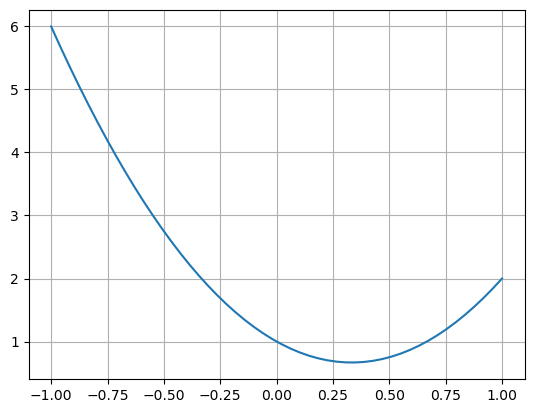

In [4]:
a=np.linspace(-1,1)
plt.plot(a,p(a));plt.grid()

**1.** On se fixe un entier $n>0$, on considère les points $x_i=\frac{i}n$ pour $i$ allant de $0$ à $n$. 

Construire les polynômes de Lagrange $L_i∈ℝ_n[x]$, vérifiant $L_i(x_i)=1$ et $L_i(x_j)=0$ pour $i≠j$. On peut utiliser `Polynomial.identity()` pour créer le polynôme $X$ ($x↦x$).

Pour $n=5$, tracer leur graphe sur $[0,1]$ sur le même graphique. Le tracer ensuite sur $[-1,2]$. Qu’observe-t-on ?

**2.** Utiliser les polynômes ainsi calculés pour calculer le polynôme interpolateur d’une fonction $f$ de votre choix (fonctions trigos et réciproques, exponentielles, log, fractions rationnelle) aux points $x_i$. Tracer le graphe de la fonction et du polynôme interpolateur sur $[-1,2]$. Visualiser sur un autre graphe la différence entre $f$ et son polynôme interpolateur de Lagrange, sur $[0,1]$ cette fois-ci.

## Exercice 2 (erreur d’approximation des fonctions, phénomène de Runge) 
Dans cet exercice, on utilisera la fonction `fit` de la classe `Polynomial`, qui permet directement de renvoyer le polynôme d’interpolation de Lagrange :

In [5]:
x,y=np.array([0.,1.,2.]),np.array([0.,1.,0.])
n=len(x)-1
Polynomial.fit(x,y,n)

Polynomial([ 1.00000000e+00, -1.57009246e-16, -1.00000000e+00], domain=[0., 2.], window=[-1.,  1.], symbol='x')

(remarquez que le polynôme est stocké dans une base adaptée aux points donnés, pour des raisons de meilleurs arrondis)

**1.** Écrire une fonction `erreurApproximation` prenant pour argument une fonction $f$, deux réels $a<b$, une liste d’abscisses $x_0,…,x_n$ (supposées strictement croissantes), un nombre de points $M$ (on pourra prendre $1000$ par défaut) et renvoie une estimation de l’erreur d’approximation entre $f$ et son polynôme interpolateur de Lagrange $P_n$ aux points $(x_i)$, donné par $E_n(f)=\max_{x∈[a,b]}|f(x)-P_n(x)|$. Pour ce faire, prendra le maximum sur $M$ points $x$ linéairement espacés entre $a$ et $b$.

Tester cette fonction pour $f=\sin$ et $a=0,b=3π$, les points $x_0=a,…,x_n=b$ étant régulièrement espacés.

**2.** Tracer l’erreur d’approximation $E_n(f)$ (toujours pour $f=\sin$ sur $[0,3π]$) en fonction de $n$ pour $1⩽n⩽30$. Quelle échelle prendre pour l’axe des ordonnées ? 
En notant que $|\sin^{(k)}(x)|⩽1$, comparer avec la majoration théorique $E_n(f)⩽\frac{1}{4(n+1)}\left(\frac{b-a}{n}\right)^{n+1}\underset{x\in[a,b]}{\max}|f^{(n+1)}(x)|$. Que se passe-t-il pour $n⩾20$ ?

**3.** On considère cette fois-ci $f_{\mathrm{R}}(x)=\frac1{1+x^2}$ sur $[-5,5]$, le contre-exemple de Runge. Tracer les graphes des polynômes d’interpolation de Lagrange de $f$ pour des points linéairement espacés sur $[-5,5]$, de degrés $2,4,6,8,10$, ainsi que celui de $f_{\mathrm{R}}$.

**4.** Comme dans la question $2$ pour cette fonction $f_{\mathrm{R}}$, afficher l’erreur d’approximation $E_n(f)=\max_{x∈[a,b]}|f(x)-P_n(x)|$ en fonction de $n∈⟦1,30⟧$ pour observer sa croissance exponentielle. 

**5.** Interpoler une fonction en des n&oelig;uds équidistribués sur un intervalle n'est pas forcément le meilleur choix, comme le montre l'absence de convergence de l'interpolation de Lagrange constatée dans la question précédente. Pour une interpolation de degré $n$, il est possible de montrer que l'erreur d'interpolation sera minimale si les n&oelig;uds d'interpolation sur l'intervalle $[a,b]$ sont (à une transformation affine près) les racines du [polynôme de Tchebychev](https://fr.wikipedia.org/wiki/Polyn%C3%B4me_de_Tchebychev) de degré $n+1$, données par
$$
\forall k\in\{0,\dots,n\},\ x_k=\frac{a+b}{2}+\frac{b-a}{2}\cos\left(\frac{2k+1}{2(n+1)}\,\pi\right), 
$$

Reprendre les deux questions précédentes en utilisant les points de Tchebychev comme nœuds d'interpolation.

## Exercice 3 (approximations polynomiales par morceaux)

L’objectif de cet exercice est de comparer les erreurs d’approximation d’une fonction $f$ lorsqu’on l’approxime sur des sous-intervalles, suivant le nombre de points que l’on prend par sous-intervalles. On veut pouvoir comparer les différentes erreurs en fonction du nombre de points où la fonction $f$ est évaluée.

**1.** Écrire une fonction `erreurMorceaux` prenant en argument une fonction $f$, des réels $a<b$, et des entiers $n$, $d$, $M$, qui calcule approxime $f$ par un polynôme de degré $d$ sur chacun des $n$ sous-intervalles $[a_i,b_i]$ avec $a_0=a$, $a_{i+1}=b_i$ pour $1⩽i<n-1$, et $b_{n-1}=b$, puis qui renvoie le maximum des erreurs d’approximation sur chacun de ces sous-intervalles (comme dans l’exercice précédent, on estimera cette erreur d’approximation à l’aide de $M$ points bien répartis). On prendra pour commencer $d+1$ points linéairement espacés sur chacun de ces sous-intervalles, comprenant les bords (de sorte que l’approximation est ainsi continue par morceaux). De même on prendra tous les sous-intervalles de longueur identique.

**2.** Pour la fonction $f_{\mathrm{R}}$ de l’exercice précédent, afficher l’erreur d’approximation pour différentes valeurs de $d$ et de $n$, en fonction du nombre $nd+1$ de points d’évaluation de la fonction. Quel est le nombre minimal de points à prendre si on veut une erreur d’approximation inférieure à $10^{-4}$ ?

**3.** Faire de même pour d’autres fonctions de votre choix.